# Graph of Chain

In this notebook, we construct a graph of a chain of models.

## Preliminaries

In [1]:
import os
import sys

from os.path import dirname

note_dir = os.getcwd()

root_dir = dirname(note_dir)
data_dir = os.path.join(root_dir, 'resc', 'data', 'tidy','nltcs')
src_dir = os.path.join(root_dir, "src")

sys.path.append(src_dir)

import morpheus
from morpheus.tests import default_chain
from morpheus.graph import (add_positions,
                            model_to_graph,
                            model_graph_traces,
                            model_graph_layout, 
                            convert_positions_to_dot_format)

In [2]:
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

## Build Chain

In [3]:
chain = default_chain()


        Learning model with desc ids:    [0, 1, 2]
                            targ ids:    [4, 5]
        

        Learning model with desc ids:    [1, 2, 5]
                            targ ids:    [7]
        

            Trying to add a model to end of the chain.
            
            Current chain targ_ids:     [4. 5.]
            New estimator desc_ids:     [1, 2, 5]
            


            Connecting attributes:  [5.]
            



In [4]:
chain.pretty_print()


        # Main
        Descriptive attributes:     [0. 1. 2.]
        Target attributes:          [4. 7.]

        ## On types (mostly nominals)
        Target attribute types:                     ['numeric', 'nominal']
        N_classes of nominal target attributes:     [2]
        Classes of nominal target attributes:       [array([0., 1.])]

        ## Weights
        Total weights of target attributes:         [1. 1.]

         
        ## Estimators
        Estimators used:        ['RandomForestRegressor', 'RandomForestClassifier']
        N_estimators:           2
        


## Build Graph

In [5]:
model_one = chain.estimators_[0]
model_two = chain.estimators_[1]

In [6]:
G_one = model_to_graph(model_one, idx=1)
add_positions(G_one)

G_two = model_to_graph(model_two, idx=2)
add_positions(G_two)

In [7]:
fig = go.Figure(data=list(model_graph_traces(G_one)),
                layout=model_graph_layout(title="Model O"))

iplot(fig)

In [8]:
fig = go.Figure(data=list(model_graph_traces(G_two)),
                layout=model_graph_layout(title="Model Two"))

iplot(fig)

## Build graph from chain

Now,we try to combine.

In [9]:
G_one.nodes()

NodeView(('d-0000', 'd-0001', 'd-0002', 'd-0004', 'd-0005', 'f-0001'))

In [10]:
for node in G_one.nodes():
    G_one.nodes()[node]["shape"] = "circle"

In [11]:
G_two.nodes()

NodeView(('d-0001', 'd-0002', 'd-0005', 'd-0007', 'f-0002'))

In [12]:
import networkx as nx
G = nx.compose(G_one, G_two)

In [13]:
G.nodes()

NodeView(('d-0000', 'd-0001', 'd-0002', 'd-0004', 'd-0005', 'f-0001', 'd-0007', 'f-0002'))

In [14]:
fig = go.Figure(data=list(model_graph_traces(G)),
                layout=model_graph_layout(title="Composition"))

iplot(fig)

In [51]:
G_one = model_to_graph(model_one, idx=1)

for node in G_one.nodes():
    G_one.nodes()[node]["shape"] = "\"{}\"".format("square")

G_two = model_to_graph(model_two, idx=2)

G = nx.compose(G_one, G_two)

from networkx.drawing.nx_pydot import write_dot, to_pydot
#G = convert_positions_to_dot_format(G)
write_dot(G, 'multi.dot')

In [70]:
X = to_pydot(G)

In [71]:
X.set('rankdir', 'LR')

In [72]:
X.to_string()

'strict digraph  {\nrankdir=LR;\n"d-0000" [bipartite=data, idx=0, shape="square"];\n"d-0001" [bipartite=data, idx=1, shape="square"];\n"d-0002" [bipartite=data, idx=2, shape="square"];\n"d-0004" [bipartite=data, idx=4, shape="square"];\n"d-0005" [bipartite=data, idx=5, shape="square"];\n"f-0001" [bipartite=func, idx=1, mod="RandomForestRegressor(bootstrap=True, criterion=\'mse\', max_depth=5,\\n           max_features=\'auto\', max_leaf_nodes=None,\\n           min_impurity_decrease=0.0, min_impurity_split=None,\\n           min_samples_leaf=1, min_samples_split=2,\\n           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,\\n           oob_score=False, random_state=None, verbose=0, warm_start=False)", shape="square"];\n"d-0007" [bipartite=data, idx=7];\n"f-0002" [bipartite=func, idx=2, mod="RandomForestClassifier(bootstrap=True, class_weight=None, criterion=\'gini\',\\n            max_depth=5, max_features=\'auto\', max_leaf_nodes=None,\\n            min_impurity_decrease=

In [46]:
with open('multi.dot') as f:
    

<_io.TextIOWrapper name='multi.dot' mode='r' encoding='UTF-8'>


In [48]:
!dot -T png multi.dot > multi.png  # Bash command

In [40]:
from IPython.display import Image, display
from IPython.core.display import HTML 

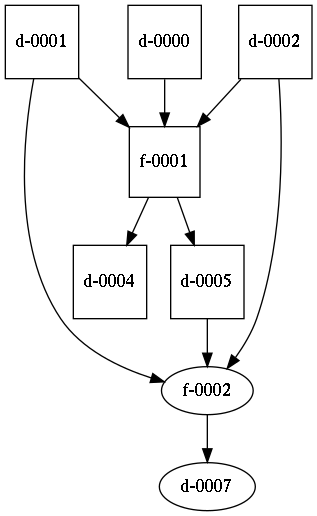

In [49]:
display(Image('multi.png', unconfined=True))